In [611]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os

In [612]:
def create_model(input_length):

    input_layer = tf.keras.layers.Input(shape=(input_length,))

    label_layer_1 = tf.keras.layers.Dense(128, activation='tanh')(input_layer)
    dropout_layer_2 = tf.keras.layers.Dropout(rate=0.5)(label_layer_1)
 
    label_layer_2 = tf.keras.layers.Dense(64, activation='tanh')(dropout_layer_2)
    dropout_layer_3 = tf.keras.layers.Dropout(rate=0.5)(label_layer_2)

    output_layer = tf.keras.layers.Dense(1, activation="linear")(dropout_layer_3)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model

In [613]:
productivityPreprocessedDataDirectory = '../Datasets/cleaned_Productivity.csv'
cleanedProductivityData = pd.read_csv(productivityPreprocessedDataDirectory, header=0, nrows=None)
cleanedProductivityData = cleanedProductivityData.drop(['mean'], axis=1)
cleanedProductivityData = cleanedProductivityData.reset_index(drop=True)

cleanedProductivityData

,LOCATION,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AUS,43.813437,45.338482,46.025462,47.089456,46.931496,47.099677,47.342066,47.873036,49.523676,...,51.671243,52.558753,52.780926,54.099648,53.945416,54.561035,54.559641,55.212012,56.214321,56.820351
1,AUT,55.825179,56.533555,57.591558,58.071618,59.181589,60.632340,62.218785,63.814049,63.814456,...,65.645538,66.080679,66.327394,67.267651,67.184974,67.999464,68.309455,68.309868,69.970148,69.634603
2,BEL,63.089170,63.233672,63.667303,64.204011,66.278551,67.287921,67.637137,68.887444,68.464336,...,68.923207,69.517696,70.513657,71.604653,71.674769,71.534022,71.681631,72.259271,74.541737,73.607184
3,BGR,14.861829,15.438275,16.313284,16.783858,17.182034,17.965425,18.618248,19.229785,19.475667,...,22.497211,22.460713,22.607390,23.296069,23.897609,24.130056,24.784139,25.687153,25.775778,26.559335
4,CAN,44.249048,44.960465,45.686833,45.787448,46.167149,47.187987,47.742663,47.802103,47.658733,...,49.335662,50.068609,51.425818,51.340885,51.524774,52.346352,52.543577,52.996192,56.971404,53.969872
5,CHE,61.437020,62.847795,63.171539,62.871440,63.236690,64.693828,66.315161,67.595243,68.253612,...,68.494780,69.759903,70.447419,69.982344,70.431631,71.561236,73.212853,73.619376,74.655861,75.909195
6,CHL,17.914007,18.467892,18.642397,18.913712,19.666660,20.756781,21.576242,22.452244,22.983801,...,23.647491,23.997201,24.412230,24.525405,24.869271,24.794088,25.319539,25.304435,28.606966,28.986876
7,COL,9.652419,9.690187,9.482174,9.500538,10.052163,10.232035,10.890402,11.347122,11.360227,...,11.629282,12.052849,12.371221,12.488134,12.724875,12.862658,13.050577,13.461440,16.115907,14.335103
8,CRI,13.419427,13.340478,13.431107,13.620390,13.961451,13.718511,14.259665,14.453706,14.909054,...,17.694625,18.620355,19.093774,19.707747,20.571849,21.056646,21.446167,22.038536,25.395334,24.023111
9,CZE,25.998047,27.994158,28.429678,29.901424,31.147574,32.765277,34.781571,36.256014,36.139167,...,36.886973,37.004724,37.432375,39.390083,39.251558,40.595969,41.161265,42.272668,43.289836,43.487932


In [614]:
valAndTest_len = int(len(cleanedProductivityData)*0.15)

test = cleanedProductivityData.tail(valAndTest_len)
test.reset_index(drop=True, inplace=True)
cleanedProductivityData.drop(cleanedProductivityData.index[-valAndTest_len:], inplace=True)

val = cleanedProductivityData.tail(valAndTest_len)
val.reset_index(drop=True, inplace=True)
cleanedProductivityData.drop(cleanedProductivityData.index[-valAndTest_len:], inplace=True)

In [615]:
cleanedProductivityData

,LOCATION,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AUS,43.813437,45.338482,46.025462,47.089456,46.931496,47.099677,47.342066,47.873036,49.523676,...,51.671243,52.558753,52.780926,54.099648,53.945416,54.561035,54.559641,55.212012,56.214321,56.820351
1,AUT,55.825179,56.533555,57.591558,58.071618,59.181589,60.632340,62.218785,63.814049,63.814456,...,65.645538,66.080679,66.327394,67.267651,67.184974,67.999464,68.309455,68.309868,69.970148,69.634603
2,BEL,63.089170,63.233672,63.667303,64.204011,66.278551,67.287921,67.637137,68.887444,68.464336,...,68.923207,69.517696,70.513657,71.604653,71.674769,71.534022,71.681631,72.259271,74.541737,73.607184
3,BGR,14.861829,15.438275,16.313284,16.783858,17.182034,17.965425,18.618248,19.229785,19.475667,...,22.497211,22.460713,22.607390,23.296069,23.897609,24.130056,24.784139,25.687153,25.775778,26.559335
4,CAN,44.249048,44.960465,45.686833,45.787448,46.167149,47.187987,47.742663,47.802103,47.658733,...,49.335662,50.068609,51.425818,51.340885,51.524774,52.346352,52.543577,52.996192,56.971404,53.969872
5,CHE,61.437020,62.847795,63.171539,62.871440,63.236690,64.693828,66.315161,67.595243,68.253612,...,68.494780,69.759903,70.447419,69.982344,70.431631,71.561236,73.212853,73.619376,74.655861,75.909195
6,CHL,17.914007,18.467892,18.642397,18.913712,19.666660,20.756781,21.576242,22.452244,22.983801,...,23.647491,23.997201,24.412230,24.525405,24.869271,24.794088,25.319539,25.304435,28.606966,28.986876
7,COL,9.652419,9.690187,9.482174,9.500538,10.052163,10.232035,10.890402,11.347122,11.360227,...,11.629282,12.052849,12.371221,12.488134,12.724875,12.862658,13.050577,13.461440,16.115907,14.335103
8,CRI,13.419427,13.340478,13.431107,13.620390,13.961451,13.718511,14.259665,14.453706,14.909054,...,17.694625,18.620355,19.093774,19.707747,20.571849,21.056646,21.446167,22.038536,25.395334,24.023111
9,CZE,25.998047,27.994158,28.429678,29.901424,31.147574,32.765277,34.781571,36.256014,36.139167,...,36.886973,37.004724,37.432375,39.390083,39.251558,40.595969,41.161265,42.272668,43.289836,43.487932


In [616]:
trainTarget = cleanedProductivityData.loc[:,"2021"]

trainInput = cleanedProductivityData.drop(['2021', 'LOCATION'], axis=1)
trainInput = trainInput.reset_index(drop=True)

In [617]:
trainTarget

0      56.820351
1      69.634603
2      73.607184
3      26.559335
4      53.969872
5      75.909195
6      28.986876
7      14.335103
8      24.023111
9      43.487932
10     68.303361
11     75.831338
12     51.829924
13     42.911145
14     61.887283
15     66.745494
16     59.141735
17     33.178190
18     36.361268
19     39.932813
20    128.214179
21     66.026154
22     47.572500
23     54.590990
24     47.283863
25     42.851352
26     46.083657
27     99.030161
28     41.437464
29     18.903278
30     67.704215
Name: 2021, dtype: float64

In [618]:
trainInput

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,43.813437,45.338482,46.025462,47.089456,46.931496,47.099677,47.342066,47.873036,49.523676,49.111719,...,50.465688,51.671243,52.558753,52.780926,54.099648,53.945416,54.561035,54.559641,55.212012,56.214321
1,55.825179,56.533555,57.591558,58.071618,59.181589,60.632340,62.218785,63.814049,63.814456,63.363388,...,64.947960,65.645538,66.080679,66.327394,67.267651,67.184974,67.999464,68.309455,68.309868,69.970148
2,63.089170,63.233672,63.667303,64.204011,66.278551,67.287921,67.637137,68.887444,68.464336,68.020751,...,68.581978,68.923207,69.517696,70.513657,71.604653,71.674769,71.534022,71.681631,72.259271,74.541737
3,14.861829,15.438275,16.313284,16.783858,17.182034,17.965425,18.618248,19.229785,19.475667,19.717737,...,21.781488,22.497211,22.460713,22.607390,23.296069,23.897609,24.130056,24.784139,25.687153,25.775778
4,44.249048,44.960465,45.686833,45.787448,46.167149,47.187987,47.742663,47.802103,47.658733,47.877704,...,49.181535,49.335662,50.068609,51.425818,51.340885,51.524774,52.346352,52.543577,52.996192,56.971404
5,61.437020,62.847795,63.171539,62.871440,63.236690,64.693828,66.315161,67.595243,68.253612,66.723475,...,68.227615,68.494780,69.759903,70.447419,69.982344,70.431631,71.561236,73.212853,73.619376,74.655861
6,17.914007,18.467892,18.642397,18.913712,19.666660,20.756781,21.576242,22.452244,22.983801,23.127019,...,22.524161,23.647491,23.997201,24.412230,24.525405,24.869271,24.794088,25.319539,25.304435,28.606966
7,9.652419,9.690187,9.482174,9.500538,10.052163,10.232035,10.890402,11.347122,11.360227,11.063533,...,11.496924,11.629282,12.052849,12.371221,12.488134,12.724875,12.862658,13.050577,13.461440,16.115907
8,13.419427,13.340478,13.431107,13.620390,13.961451,13.718511,14.259665,14.453706,14.909054,15.331663,...,17.944786,17.694625,18.620355,19.093774,19.707747,20.571849,21.056646,21.446167,22.038536,25.395334
9,25.998047,27.994158,28.429678,29.901424,31.147574,32.765277,34.781571,36.256014,36.139167,35.303035,...,36.734795,36.886973,37.004724,37.432375,39.390083,39.251558,40.595969,41.161265,42.272668,43.289836


In [619]:
maxTrainInput = np.max(trainInput.max())

In [620]:
maxTrainTarget = np.max(trainTarget)

In [621]:
test

,LOCATION,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,SVK,23.959311,24.800377,26.583421,28.668586,29.479998,30.452693,32.274839,34.710747,35.458839,...,37.942721,38.860596,39.622443,40.990746,41.146460,42.075311,43.157588,44.096386,46.742652,48.091287
1,SVN,31.263905,32.355075,32.497236,33.500620,34.599443,36.938074,39.128271,40.808356,40.752803,...,40.691154,40.292879,40.753894,40.981064,42.404997,44.000646,45.061827,45.540786,45.858710,47.075129
2,SWE,55.003831,55.439481,57.448729,59.621070,61.719788,63.473288,65.301313,65.489276,64.336167,...,65.868736,66.395834,67.152902,69.074511,68.649665,69.261329,69.514519,71.101216,71.857873,73.669232
3,TUR,26.246346,24.681869,26.339978,28.078322,30.644277,32.580282,34.111688,35.924232,35.805009,...,37.905972,40.465033,40.443125,42.094218,43.044787,45.090563,46.227634,47.988606,56.539377,53.129297
4,USA,54.498167,55.693841,57.234571,58.965218,60.508037,61.772075,62.356937,63.232583,64.042431,...,68.118059,68.407849,68.665009,69.047471,69.256659,69.876907,70.664702,71.520554,73.957559,74.838217
5,ZAF,15.214717,15.876697,16.567479,17.753931,18.022495,17.469945,18.189686,19.043363,18.446211,...,20.516167,20.514456,20.533058,22.553865,19.938277,19.927223,19.859829,19.803255,21.265347,22.835387


In [622]:
testTarget = test.loc[:,"2021"]

testInput = test.drop(['2021', 'LOCATION'], axis=1)
testInput = testInput.reset_index(drop=True)

In [623]:
testTarget

0    48.091287
1    47.075129
2    73.669232
3    53.129297
4    74.838217
5    22.835387
Name: 2021, dtype: float64

In [624]:
testInput

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,23.959311,24.800377,26.583421,28.668586,29.479998,30.452693,32.274839,34.710747,35.458839,34.443631,...,37.384872,37.942721,38.860596,39.622443,40.990746,41.146460,42.075311,43.157588,44.096386,46.742652
1,31.263905,32.355075,32.497236,33.500620,34.599443,36.938074,39.128271,40.808356,40.752803,38.181149,...,40.925467,40.691154,40.292879,40.753894,40.981064,42.404997,44.000646,45.061827,45.540786,45.858710
2,55.003831,55.439481,57.448729,59.621070,61.719788,63.473288,65.301313,65.489276,64.336167,63.430047,...,66.185529,65.868736,66.395834,67.152902,69.074511,68.649665,69.261329,69.514519,71.101216,71.857873
3,26.246346,24.681869,26.339978,28.078322,30.644277,32.580282,34.111688,35.924232,35.805009,34.328244,...,37.128369,37.905972,40.465033,40.443125,42.094218,43.044787,45.090563,46.227634,47.988606,56.539377
4,54.498167,55.693841,57.234571,58.965218,60.508037,61.772075,62.356937,63.232583,64.042431,66.089234,...,67.861870,68.118059,68.407849,68.665009,69.047471,69.256659,69.876907,70.664702,71.520554,73.957559
5,15.214717,15.876697,16.567479,17.753931,18.022495,17.469945,18.189686,19.043363,18.446211,18.952649,...,20.299933,20.516167,20.514456,20.533058,22.553865,19.938277,19.927223,19.859829,19.803255,21.265347


In [625]:
val

,LOCATION,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NOR,73.356584,76.081539,77.771226,80.268770,81.894347,82.750646,82.157474,80.742255,78.348249,...,78.839549,79.340132,79.913585,81.021883,81.489588,83.062125,82.656232,82.030731,83.242597,84.456196
1,NZL,35.082473,35.741581,36.439294,37.128721,36.969910,36.908863,37.421156,38.859858,37.664881,...,41.552746,40.677193,40.618259,41.622831,41.181840,41.238821,42.124762,41.896816,42.493108,43.344340
2,POL,22.242809,23.011311,24.271393,25.346800,26.307045,26.725170,27.469543,28.184305,28.402336,...,33.099257,33.466584,34.050522,34.879786,35.577780,37.315221,39.854227,41.752351,41.230426,41.517137
3,PRT,33.384117,33.739822,33.992966,34.131576,34.875983,35.272311,35.927996,36.491637,36.727659,...,38.619119,39.177467,38.779615,38.771567,38.796107,39.111943,39.075294,39.667314,40.114162,40.508787
4,ROU,12.320277,13.105868,15.299585,15.921944,17.832453,18.818376,20.350859,21.467073,23.850073,...,24.696408,25.927477,26.867369,28.121919,29.395662,31.211224,32.557472,33.576037,32.846876,37.514761
5,RUS,15.655187,16.455490,16.822009,18.010897,19.061609,20.051286,21.373371,22.622358,23.700889,...,24.747730,25.261952,25.331478,24.649304,24.723500,25.137929,25.884473,26.698227,27.680927,28.699798


In [626]:
valTarget = val.loc[:,"2021"]

valInput = val.drop(['2021', 'LOCATION'], axis=1)
valInput = valInput.reset_index(drop=True)

In [627]:
valTarget

0    84.456196
1    43.344340
2    41.517137
3    40.508787
4    37.514761
5    28.699798
Name: 2021, dtype: float64

In [628]:
valInput

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,73.356584,76.081539,77.771226,80.268770,81.894347,82.750646,82.157474,80.742255,78.348249,78.455084,...,78.170009,78.839549,79.340132,79.913585,81.021883,81.489588,83.062125,82.656232,82.030731,83.242597
1,35.082473,35.741581,36.439294,37.128721,36.969910,36.908863,37.421156,38.859858,37.664881,39.646401,...,40.052755,41.552746,40.677193,40.618259,41.622831,41.181840,41.238821,42.124762,41.896816,42.493108
2,22.242809,23.011311,24.271393,25.346800,26.307045,26.725170,27.469543,28.184305,28.402336,29.321396,...,32.549662,33.099257,33.466584,34.050522,34.879786,35.577780,37.315221,39.854227,41.752351,41.230426
3,33.384117,33.739822,33.992966,34.131576,34.875983,35.272311,35.927996,36.491637,36.727659,36.569423,...,38.245249,38.619119,39.177467,38.779615,38.771567,38.796107,39.111943,39.075294,39.667314,40.114162
4,12.320277,13.105868,15.299585,15.921944,17.832453,18.818376,20.350859,21.467073,23.850073,23.643342,...,24.049819,24.696408,25.927477,26.867369,28.121919,29.395662,31.211224,32.557472,33.576037,32.846876
5,15.655187,16.455490,16.822009,18.010897,19.061609,20.051286,21.373371,22.622358,23.700889,22.631987,...,24.058067,24.747730,25.261952,25.331478,24.649304,24.723500,25.137929,25.884473,26.698227,27.680927


In [629]:
trainInput = trainInput/maxTrainInput
trainTarget = trainTarget/maxTrainTarget
valInput = valInput/maxTrainInput
valTarget = valTarget/maxTrainTarget
testInput = testInput/maxTrainInput
testTarget = testTarget/maxTrainTarget

In [630]:
model = create_model(21)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss="mse", metrics=["mse", "mae"]) 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1e-6, patience=10, verbose=1, mode="min", restore_best_weights=True)

callbacks=[early_stopping]

model.summary()

training_history = model.fit(x = np.asarray(trainInput).astype('float32'), y = np.asarray(trainTarget).astype('float32'),                         
                                      #steps_per_epoch=steps_per_training_epoch,
                                      epochs = 1000,
                                      verbose = 1,
                                      callbacks=callbacks,
                                      validation_data = (valInput, valTarget),
                                      validation_freq=1,
                                      #validation_steps=self.__validation_steps
                                      )

model.summary()

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 21)]              0         
                                                                 
 dense_76 (Dense)            (None, 128)               2816      
                                                                 
 dropout_51 (Dropout)        (None, 128)               0         
                                                                 
 dense_77 (Dense)            (None, 64)                8256      
                                                                 
 dropout_52 (Dropout)        (None, 64)                0         
                                                                 
 dense_78 (Dense)            (None, 1)                 65        
                                                                 
Total params: 11,137
Trainable params: 11,137
Non-trainabl

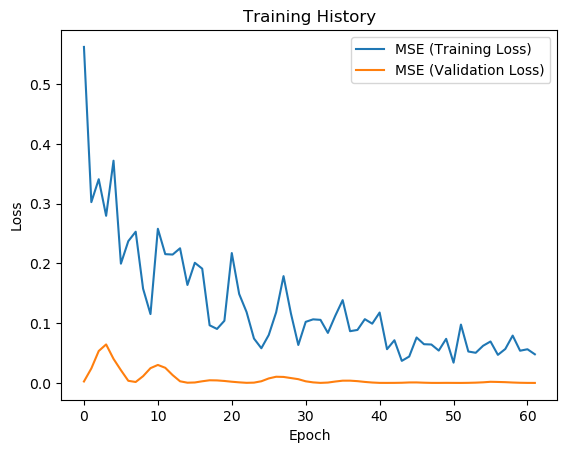

In [631]:
plt.plot(training_history.history["loss"], label="MSE (Training Loss)")
plt.plot(training_history.history["val_loss"], label="MSE (Validation Loss)")
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [632]:
start_time = time.time()
testing_history = model.predict(x=testInput, verbose=2)

end_time = time.time()
test_time = end_time - start_time

evaluation_metrics = model.evaluate(x=testInput, y=testTarget)

1/1 - 0s - 50ms/epoch - 50ms/step
1/1 [==============================] - 0s 24ms/step - loss: 2.5067e-05 - mse: 2.5067e-05 - mae: 0.0035


In [633]:
print(evaluation_metrics)

[2.506697637727484e-05, 2.506697637727484e-05, 0.0034713696222752333]


In [634]:
print(testing_history*maxTrainTarget)

[[47.623905]
 [47.051704]
 [73.341484]
 [51.70065 ]
 [75.13766 ]
 [22.71155 ]]


In [635]:
print(testTarget*maxTrainTarget)

0    48.091287
1    47.075129
2    73.669232
3    53.129297
4    74.838217
5    22.835387
Name: 2021, dtype: float64


In [636]:
def mae(prediction, true):
    MAE = 0
    for i in range(len(prediction)):
        MAE += abs(true[i] - prediction[i])
    MAE = MAE / len(prediction)
        
    return MAE

def rmse(prediction, true):
    RMSE = 0
    for i in range(len(prediction)):
        RMSE += (true[i] - prediction[i])**2
    RMSE = RMSE / len(prediction)
    RMSE = np.sqrt(RMSE)
        
    return RMSE

In [637]:
print("MAE: " + str(mae(testing_history*maxTrainTarget, testTarget*maxTrainTarget)))
print("RMSE: " + str(rmse(testing_history*maxTrainTarget, testTarget*maxTrainTarget)))

MAE: [0.4450798]
RMSE: [0.64192975]


In [638]:
model_path = "../models/" + "trainedANN.h5"

if not os.path.exists (model_path):
    open((model_path), 'a').close()

model.save(model_path)

In [639]:
"""loadedModel = tf.keras.models.load_model(model_path)

startTime = time.time()
testingHistory = loadedModel.predict(x=testInput, verbose=2)

endTime = time.time()
testTime = endTime - startTime

evaluationMetrics = loadedModel.evaluate(x=testInput, y=testTarget)

print(evaluationMetrics)

print(testingHistory*maxTrainTarget)

print(testTarget*maxTrainTarget)"""

'loadedModel = tf.keras.models.load_model(model_path)\n\nstartTime = time.time()\ntestingHistory = loadedModel.predict(x=testInput, verbose=2)\n\nendTime = time.time()\ntestTime = endTime - startTime\n\nevaluationMetrics = loadedModel.evaluate(x=testInput, y=testTarget)\n\nprint(evaluationMetrics)\n\nprint(testingHistory*maxTrainTarget)\n\nprint(testTarget*maxTrainTarget)'